In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

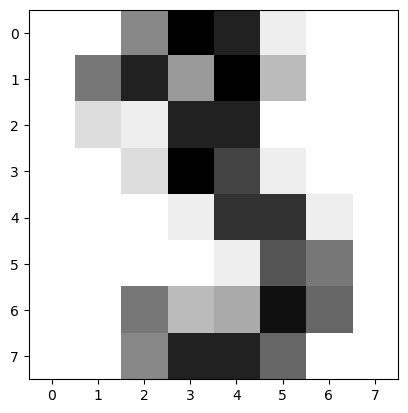

In [4]:
digits = datasets.load_digits()
plt.imshow(digits.images[3], cmap=plt.cm.gray_r, interpolation='nearest')

In [5]:
# 평탄화 작업, 2차원 배열을 1차원으로 평탄화하는 작업이다.
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.25, random_state=0)
# random_state는 데이터를 무작위로 나누거나 섞을 때 사용되는 난수 발생기의 시드(seed) 값
X_train

array([[ 0.,  3., 13., ..., 12.,  9.,  1.],
       [ 0.,  0.,  1., ..., 13.,  1.,  0.],
       [ 0.,  0.,  4., ...,  9.,  0.,  0.],
       ...,
       [ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  4., ...,  0.,  0.,  0.],
       [ 0.,  0.,  6., ..., 11.,  0.,  0.]])

적은 이웃 수 사용: 이웃의 수를 적게 설정하면 모델이 더 복잡해지고 학습 데이터에 더 적합합니다. 이 경우에는 주변 데이터 포인트에 민감하게 반응하여 과적합(overfitting)이 발생할 수 있습니다.

많은 이웃 수 사용: 이웃의 수를 많이 설정하면 모델이 단순해지고 일반화 성능이 향상될 수 있습니다. 주변 데이터 포인트의 영향을 받지 않고 전체적인 추세를 파악할 수 있으며, 과적합을 줄일 수 있습니다.

In [21]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [22]:
# 테스트 데이터로 예측
y_pred = knn.predict(X_test)

# 정확도 예측
scores = metrics.accuracy_score(y_test, y_pred)
print(scores)

0.98


In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [24]:
from sklearn.svm import SVC

clf_svm = SVC(random_state=0)
clf_svm.fit(X_train, y_train)

pred_svm = clf_svm.predict(X_test)

print("\n--- SVM Classifier ---")
print(accuracy_score(y_test, pred_svm))
print(confusion_matrix(y_test, pred_svm))


--- SVM Classifier ---
0.9911111111111112
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 43  0  0  0  0  0  0  0  0]
 [ 0  0 44  0  0  0  0  0  0  0]
 [ 0  0  0 44  0  0  0  0  1  0]
 [ 0  0  0  0 38  0  0  0  0  0]
 [ 0  0  0  0  0 47  0  0  0  1]
 [ 0  0  0  0  0  0 52  0  0  0]
 [ 0  0  0  0  0  0  0 48  0  0]
 [ 0  1  0  0  0  0  0  0 47  0]
 [ 0  0  0  0  0  1  0  0  0 46]]


In [25]:
# Build a logistic regression classifier and predict

clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(X_train, y_train)

pred_lr = clf_lr.predict(X_test) 
#예측한 값을 pred_lr에 저장

print ("\n--- Logistic Regression Classifier ---")
print (accuracy_score(y_test, pred_lr))
#예측한 값과 실제 값을 비교
print (confusion_matrix(y_test, pred_lr))


--- Logistic Regression Classifier ---
0.9511111111111111
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 40  0  0  0  0  0  0  2  1]
 [ 0  1 40  3  0  0  0  0  0  0]
 [ 0  0  0 43  0  0  0  0  1  1]
 [ 0  0  0  0 37  0  0  1  0  0]
 [ 0  0  0  0  0 46  0  0  0  2]
 [ 0  1  0  0  0  0 51  0  0  0]
 [ 0  0  0  1  1  0  0 46  0  0]
 [ 0  3  1  0  0  0  0  0 43  1]
 [ 0  0  0  0  0  1  0  0  1 45]]


C:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [26]:
clf_nn = MLPClassifier(random_state=0)
clf_nn.fit(X_train, y_train)

pred_nn = clf_nn.predict(X_test)

print ("\n--- Neural Network Classifier ---")
print (accuracy_score(y_test, pred_nn))
print (confusion_matrix(y_test, pred_nn))


--- Neural Network Classifier ---
0.9733333333333334
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 42  0  0  0  1  0  0  0  0]
 [ 0  0 44  0  0  0  0  0  0  0]
 [ 0  0  0 44  0  0  0  0  1  0]
 [ 0  0  0  0 37  0  0  1  0  0]
 [ 0  0  0  0  0 47  0  0  0  1]
 [ 0  1  0  0  0  0 51  0  0  0]
 [ 0  0  0  0  0  0  0 48  0  0]
 [ 0  2  1  0  0  0  1  0 43  1]
 [ 1  0  0  0  0  1  0  0  0 45]]


In [27]:
# Build a decision tree classifier and predict

clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(X_train, y_train)

pred_dt = clf_dt.predict(X_test)

print ("\n--- Decision Tree Classifier ---")
print (accuracy_score(y_test, pred_dt))
print (confusion_matrix(y_test, pred_dt))


--- Decision Tree Classifier ---
0.8377777777777777
[[34  0  0  0  0  0  1  0  0  2]
 [ 0 36  4  1  1  0  0  0  0  1]
 [ 1  3 35  1  1  0  0  0  1  2]
 [ 0  1  3 35  0  0  0  1  2  3]
 [ 1  1  0  0 32  0  1  1  0  2]
 [ 1  0  1  3  0 41  0  0  1  1]
 [ 0  0  0  1  0  0 50  0  1  0]
 [ 1  0  1  1  1  2  0 39  1  2]
 [ 0  2  2  6  0  2  0  0 36  0]
 [ 0  2  2  2  1  1  0  0  0 39]]


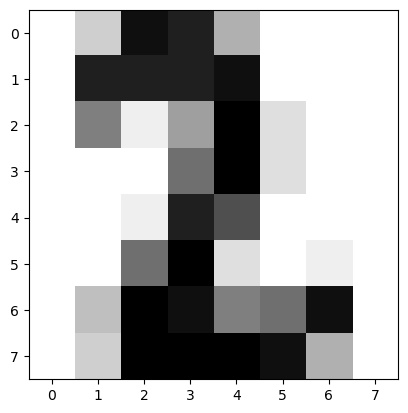

In [39]:
# 10번째 이미지를 출력
test_num = X_test[10]
plt.imshow(test_num.reshape(8,8), cmap=plt.cm.gray_r, interpolation='nearest')

In [40]:
# 10번째 이미지를 보고 예측
y_pred = knn.predict([test_num])
print(y_pred)

[2]


In [41]:
X_train

array([[ 0.,  3., 13., ..., 12.,  9.,  1.],
       [ 0.,  0.,  1., ..., 13.,  1.,  0.],
       [ 0.,  0.,  4., ...,  9.,  0.,  0.],
       ...,
       [ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  4., ...,  0.,  0.,  0.],
       [ 0.,  0.,  6., ..., 11.,  0.,  0.]])

In [42]:
y_train

array([2, 8, 9, ..., 7, 7, 8])

In [43]:
X_test

array([[ 0.,  0., 11., ..., 13., 16.,  8.],
       [ 0.,  1., 15., ...,  1.,  0.,  0.],
       [ 0.,  2., 13., ..., 16., 16.,  3.],
       ...,
       [ 0.,  0., 11., ...,  7.,  0.,  0.],
       [ 0.,  0.,  5., ...,  7.,  0.,  0.],
       [ 0.,  2., 14., ...,  6.,  0.,  0.]])

In [44]:
y_test

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5, 2, 8, 6, 6, 6, 6, 1, 0, 5, 8, 8, 7,
       8, 4, 7, 5, 4, 9, 2, 9, 4, 7, 6, 8, 9, 4, 3, 1, 0, 1, 8, 6, 7, 7,
       1, 0, 7, 6, 2, 1, 9, 6, 7, 9, 0, 0, 5, 1, 6, 3, 0, 2, 3, 4, 1, 9,
       2, 6, 9, 1, 8, 3, 5, 1, 2, 8, 2, 2, 9, 7, 2, 3, 6, 0, 5, 3, 7, 5,
       1, 2, 9, 9, 3, 1, 7, 7, 4, 8, 5, 8, 5, 5, 2, 5, 9, 0, 7, 1, 4, 7,
       3, 4, 8, 9, 7, 9, 8, 2, 6, 5, 2, 5, 8, 4, 8, 7, 0, 6, 1, 5, 9, 9,
       9, 5, 9, 9, 5, 7, 5, 6, 2, 8, 6, 9, 6, 1, 5, 1, 5, 9, 9, 1, 5, 3,
       6, 1, 8, 9, 8, 7, 6, 7, 6, 5, 6, 0, 8, 8, 9, 8, 6, 1, 0, 4, 1, 6,
       3, 8, 6, 7, 4, 5, 6, 3, 0, 3, 3, 3, 0, 7, 7, 5, 7, 8, 0, 7, 8, 9,
       6, 4, 5, 0, 1, 4, 6, 4, 3, 3, 0, 9, 5, 9, 2, 1, 4, 2, 1, 6, 8, 9,
       2, 4, 9, 3, 7, 6, 2, 3, 3, 1, 6, 9, 3, 6, 3, 2, 2, 0, 7, 6, 1, 1,
       9, 7, 2, 7, 8, 5, 5, 7, 5, 2, 3, 7, 2, 7, 5, 5, 7, 0, 9, 1, 6, 5,
       9, 7, 4, 3, 8, 0, 3, 6, 4, 6, 3, 2, 6, 8, 8, 8, 4, 6, 7, 5, 2, 4,
       5, 3, 2, 4, 6, 9, 4, 5, 4, 3, 4, 6, 2, 9, 0,

### 딥러닝 응용

In [57]:
#one hot encoding 하기

y_train_one = pd.get_dummies(y_train).values
y_train_one.shape

(1347, 10)

In [58]:
#one hot encoding 하기

y_test_one = pd.get_dummies(y_test).values
y_test_one.shape

(450, 10)

In [59]:
X_train.shape[1]

64

In [60]:
X_test.shape

(450, 64)

In [61]:
y_train.shape

(1347,)

In [62]:
y_test.shape

(450,)

Neural Network 모델에서 input_shape는 입력 데이터의 형태를 정의하는 중요한 매개변수이며, 이를 튜플 형태로 지정해야 합니다. 따라서 input_shape=(64,)와 같이 쉼표로 끝나는 튜플을 사용하여 입력 데이터의 특징 수를 정확하게 나타내야 합니다.

### 콤마로 끝나는 경우의 의미
단일 요소 튜플: 괄호 없이 콤마로 끝나면 파이썬은 이를 단일 요소를 가지는 튜플로 해석합니다. 즉, (1,)과 같은 형태로 쓰는 것과 동일한 의미입니다.

여러 요소 튜플: 괄호 없이 요소를 콤마로 구분하여 나열하면 파이썬은 이를 여러 요소를 가지는 튜플로 해석합니다.

따라서 콤마로 끝나는 경우에는 파이썬 인터프리터가 튜플을 올바르게 해석하여 튜플 객체를 생성합니다. 이는 튜플의 특별한 생성 규칙 중 하나이며, 괄호를 사용하여 명시적으로 튜플을 생성하지 않고도 간편하게 튜플을 생성할 수 있는 방법 중 하나입니다.

In [67]:
#Defining the model 
#분류 예제
#입력과 출력값을 올바르게 지정하는 것이 중요함!!

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam, Nadam


model = Sequential()

model.add(Dense(500, input_shape=(X_test.shape[1],), activation='relu'))
#input_shape: 튜플을 통해 입력 데이터의 모양을 지정한다. input_shape=(int_value,) 첫 번째 레이어에서만 사용된다.
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))
#출력되는 숫자가 0~9이기 때문에 출력은 10으로 조정

model.compile(Nadam(learning_rate=0.02),'categorical_crossentropy',metrics=['accuracy'])
# 이진 분류일 때, model.compile(Adam(lr=0.04),'bce',metrics=['accuracy']) 를 써야한다.

model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_34 (Dense)            (None, 500)               32500     
                                                                 
 dense_35 (Dense)            (None, 128)               64128     
                                                                 
 dense_36 (Dense)            (None, 64)                8256      
                                                                 
 dense_37 (Dense)            (None, 10)                650       
                                                                 
Total params: 105534 (412.24 KB)
Trainable params: 105534 (412.24 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [68]:
model_history=model.fit(x=X_train, y=y_train_one, epochs=50, batch_size=32, validation_data=(X_test, y_test_one))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test_one,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/50
43/43 [==============================] - 4s 12ms/step - loss: 3.2303 - accuracy: 0.6615 - val_loss: 0.6855 - val_accuracy: 0.7622
Epoch 2/50
43/43 [==============================] - 0s 5ms/step - loss: 0.3159 - accuracy: 0.9139 - val_loss: 0.2371 - val_accuracy: 0.9156
Epoch 3/50
43/43 [==============================] - 0s 5ms/step - loss: 0.2316 - accuracy: 0.9339 - val_loss: 0.2267 - val_accuracy: 0.9244
Epoch 4/50
43/43 [==============================] - 0s 6ms/step - loss: 0.1916 - accuracy: 0.9436 - val_loss: 2.0589 - val_accuracy: 0.7111
Epoch 5/50
43/43 [==============================] - 0s 5ms/step - loss: 0.3660 - accuracy: 0.9176 - val_loss: 1.4701 - val_accuracy: 0.7444
Epoch 6/50
43/43 [==============================] - 0s 5ms/step - loss: 0.2706 - accuracy: 0.9220 - val_loss: 0.3438 - val_accuracy: 0.9444
Epoch 7/50
43/43 [==============================] - 0s 5ms/step - loss: 0.1345 - accuracy: 0.9547 - val_loss: 0.3228 - val_accuracy: 0.9556
Epoch 8/50
43/43 [=

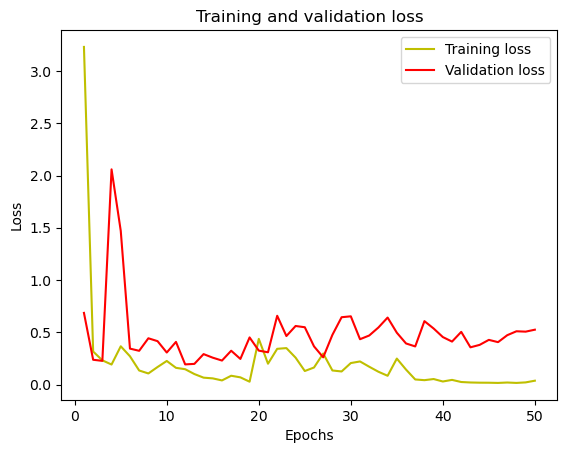

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

# 훈련 손실(training loss)과 검증 손실(validation loss) 추출
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

# 에포크(epoch) 범위 생성
epochs = range(1, len(loss) + 1)

# 훈련 손실(training loss)과 검증 손실(validation loss) 시각화
plt.plot(epochs, loss, 'y', label='Training loss')  # 훈련 손실을 노란색(yellow)으로 플롯
plt.plot(epochs, val_loss, 'r', label='Validation loss')  # 검증 손실을 빨간색(red)으로 플롯
plt.title('Training and validation loss')  # 그래프 제목 설정
plt.xlabel('Epochs')  # x축 레이블 설정
plt.ylabel('Loss')  # y축 레이블 설정
plt.legend()  # 범례(legend) 표시
plt.show()  # 그래프 출력


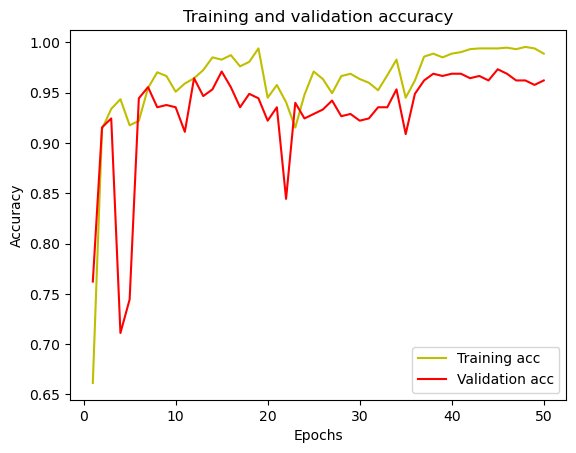

In [70]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [71]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.93      0.95      0.94        43
           2       1.00      1.00      1.00        44
           3       1.00      0.96      0.98        45
           4       1.00      0.95      0.97        38
           5       0.98      0.96      0.97        48
           6       1.00      1.00      1.00        52
           7       0.94      0.96      0.95        48
           8       0.93      0.90      0.91        48
           9       0.87      0.96      0.91        47

    accuracy                           0.96       450
   macro avg       0.96      0.96      0.96       450
weighted avg       0.96      0.96      0.96       450

[[37  0  0  0  0  0  0  0  0  0]
 [ 0 41  0  0  0  0  0  0  1  1]
 [ 0  0 44  0  0  0  0  0  0  0]
 [ 0  0  0 43  0  0  0  0  1  1]
 [ 0  0  0  0 36  0  0  2  0  0]
 [ 0  0  0  0  0 46  0  0  0  2]
 [ 0  0  0  0  0  0 52  0  0  0]
 [ 0  0  0